In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Tips.xlsx', sheets = 'tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Question:-1 What is the overall average tip?**

In [4]:
Overall_Avg_Tip = np.mean(df['tip'])

In [5]:
print('The overall Avg Tip is $', round(Overall_Avg_Tip,2), sep = '')

The overall Avg Tip is $3.0


**Question:-2 Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?**

In [6]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

 mean and median does not have any significant difference so that tip field probably does not  have any outliers.

**Question:-3 Prepare a boxplot for 'tip', are there any outliers?**

In [7]:
import matplotlib.pyplot as plt

In [61]:
import seaborn as sns

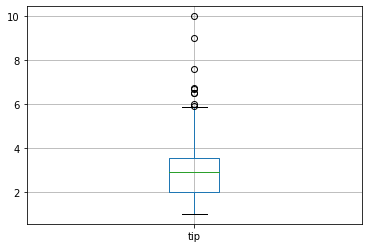

In [50]:
df.boxplot(['tip'])
plt.show()

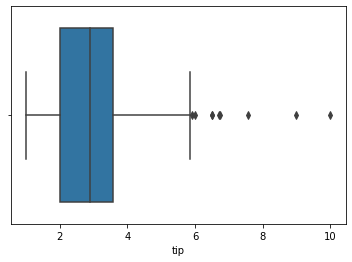

In [62]:
sns.boxplot(df['tip'], orient = 'horizontal')
plt.show()

In [49]:
df[df.tip >= 9]

,total_bill,tip,pct_tip,sex,smoker,day,time,size
170,50.81,10.0,0.196812,Male,Yes,Sat,Dinner,3
212,48.33,9.0,0.186220,Male,No,Sat,Dinner,4


In [34]:
print(' its true to filed contains outliers')

 its true to filed contains outliers


**Question:-4 Prepare a boxplot for 'total_bill', are there any outliers?**

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


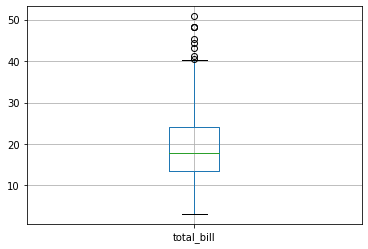

In [51]:
df.boxplot(['total_bill'])
plt.show()


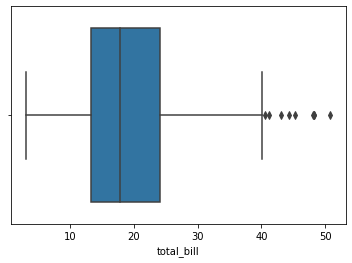

In [64]:
sns.boxplot(df['total_bill'])
plt.show()

In [38]:
print( 'its true, the total_ bill contains outliers')

its true, the total_ bill contains outliers


**Question:-5 Gender: what is the percent of females in the data?** 

In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
r = df.sex.value_counts(normalize = True,)
print(r)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64


Their are 35.65% Females

**Question:-6 Prepare a bar plot with the bars representing the percentage of records for each gender.**

In [14]:
g = df.sex.value_counts(normalize = True, )
print(g)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64


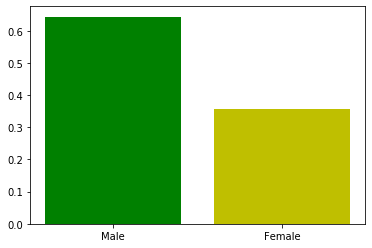

In [15]:
plt.bar(g.index, g.values, color= ['g', 'y'])
plt.show()

**Question:-7 Does the average tip differ by gender? Does one gender tip more than the other?**

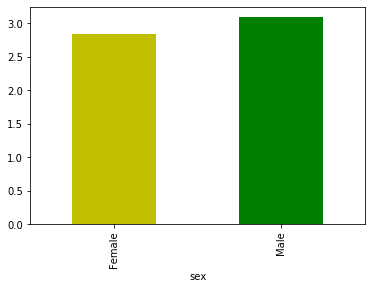

In [16]:
df.groupby('sex')['tip'].mean().plot.bar(color = ['y', 'g'])
plt.show()

its true,the average tip slightly differs by gender and male tip slightly more then female

**Question:-8 Does the average tip differ by time of day?**

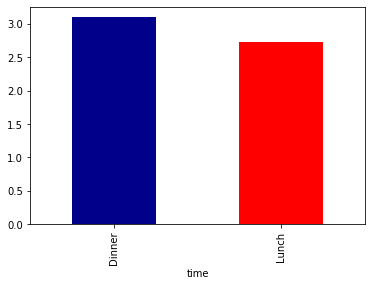

In [47]:
df.groupby('time')['tip'].mean().plot.bar(color = ['darkblue', 'r'])
plt.show()


In [42]:
print('people give more tip during dinner compared to lunch')

people give more tip during dinner compared to lunch


**Question:-9 Does the average tip differ by size(number of people at the table)?**

In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


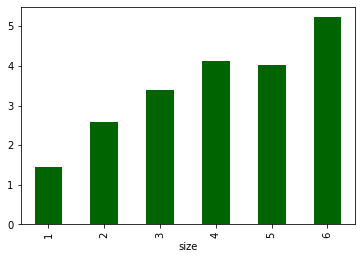

In [19]:
df.groupby('size')['tip'].mean().plot.bar(color = 'darkgreen')
plt.show()

 its true ,more the number of people,higher the tip.

**Question:-10 Do smokers tip more than non-smokers?**

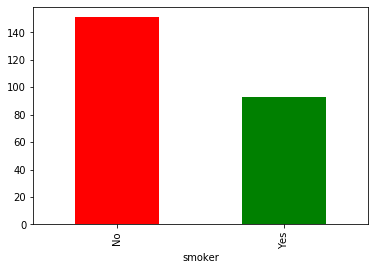

In [20]:
df.groupby('smoker')['tip'].count().plot.bar(color = ['r', 'g'])
plt.show()

False, smokers tip less than non-smokers.

**Question:-11 Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?**

In [21]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
df.groupby(['smoker', 'sex'])['tip'].mean().unstack()

sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.931515,3.051167


In [23]:
pd.pivot_table(data = df, index = 'sex', columns = 'smoker', values = 'tip', aggfunc = np.median)

smoker,No,Yes
sex,,
Female,2.68,2.88
Male,2.74,3.00


In [24]:
pd.pivot_table(data = df, index = 'sex', columns = 'smoker', values = 'tip', aggfunc = lambda x:np.quantile(x, 0.2))

smoker,No,Yes
sex,,
Female,1.752,2.0
Male,2.000,2.0


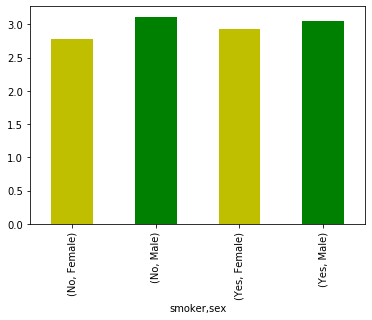

In [25]:
df.groupby(['smoker', 'sex'])['tip'].mean().plot.bar(color = ['y','g'])
plt.show()

The group with male and non-smoker tips the most. Also group with male and smoker tips slightly less than group with male non-smoker.

**Question:-12 Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.**

In [26]:
df.insert(2, 'pct_tip', df.tip / df.total_bill)

In [27]:
df.head()

,total_bill,tip,pct_tip,sex,smoker,day,time,size
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4


**Question:-13 Does pct_tip differ by gender? Does one gender tip more than the other?**

In [28]:
pd.pivot_table(data = df, index = 'sex', columns = 'smoker', values = 'pct_tip')

smoker,No,Yes
sex,,
Female,0.156921,0.182150
Male,0.160669,0.152771


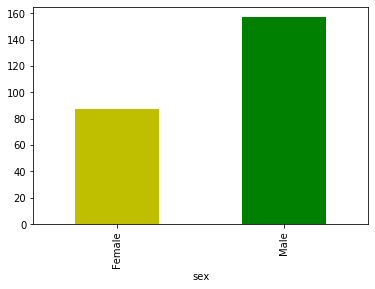

In [29]:
df.groupby('sex')['pct_tip'].count().plot.bar(color = ['y', 'g'])
plt.show()

its true, the pct_tip differ by gender and male tip more than female.

**Question:-14 Does pct_tip differ by size (number of people at the table)?** 

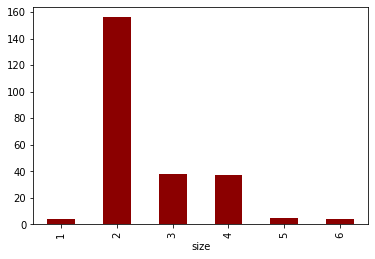

In [30]:
df.groupby('size')['pct_tip'].count().plot.bar(color = "darkred")
plt.show()

its true, the pct_tip do differ by size and the table with size 2 gives maximum pct_tip

**Question:-15 Make the gender vs. smoker view using pct_tip  - does your inference change?**

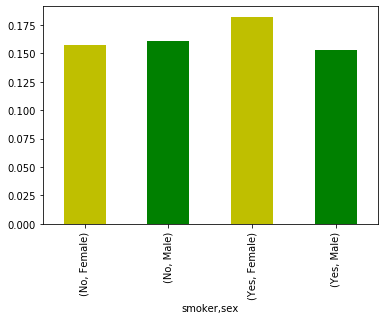

In [31]:
df.groupby(['smoker', 'sex'])['pct_tip'].mean().plot.bar(color = ['y', 'g'])
plt.show()

its true , the group with female smoker gives more average pct_tip

**Question:-16 Make a scatter plot of total_bill vs. tip**

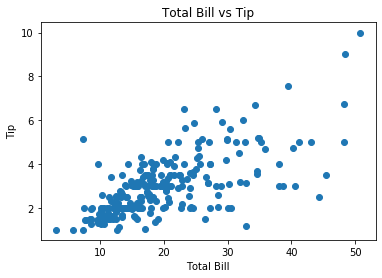

In [52]:
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')

plt.scatter(df['total_bill'][:500], df['tip'][:500])
plt.show()

In [53]:
import seaborn as sns

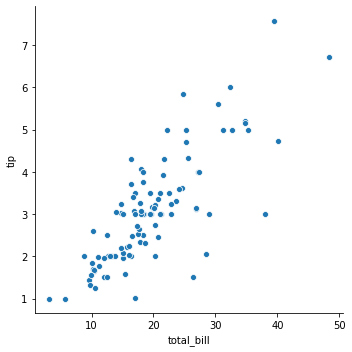

In [60]:
sns.relplot(x = 'total_bill', y = 'tip', data = df[:100], kind = 'scatter')
plt.show()

**Question:-17 Make a scatter plot of total_bill vs. pct_tip.**

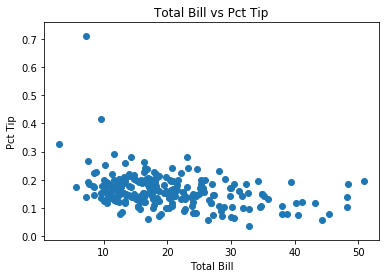

In [67]:
plt.xlabel('Total Bill')
plt.ylabel('Pct Tip')
plt.title('Total Bill vs Pct Tip')

plt.scatter(df['total_bill'][:600], df['pct_tip'][:600])
plt.show()

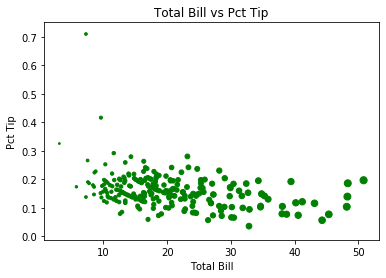

In [68]:
plt.xlabel('Total Bill')
plt.ylabel('Pct Tip')
plt.title('Total Bill vs Pct Tip')

plt.scatter(df['total_bill'][:600], df['pct_tip'][:600], s = df['total_bill'], c = 'g')
plt.show()

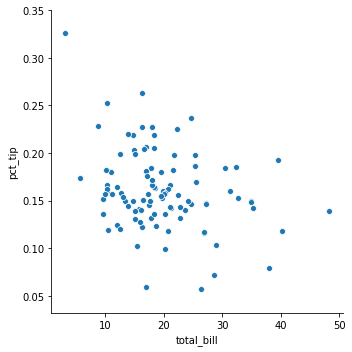

In [69]:
sns.relplot(x = 'total_bill', y = 'pct_tip', data = df[:100], kind = 'scatter')
plt.show()